## Bienvenidos a al ambiente de ejecución de código Colab!!!

En el presente ejemplo comenzaremos con un dataset **público** utilizado para la formación de **Machine Learning** denominado Iris dataset que se basa en describir las longitudes del sépalo y pétalo de tres tipos de flores: Setosa, virginica y versicolor. Este dataset es uno de los más básicos y usados para introducirnos en el mundo de la ciencia de datos.

Podemos ver una breve historia de este dataset [acá](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)

In [0]:
#Importamos librerías útiles
import pandas as pd #Es una librería para manipulación de datos
import seaborn as sns  #Es una librería para poder hacer nuestros gráficos rápidos y atractivos

In [0]:
#Asignamos la variable iris 
iris = pd.read_csv('https://raw.githubusercontent.com/javalillo13689/hackspace/master/iris.csv')

In [0]:
#Mostramos los primeros cinco (5) registros del dataset iris con la instrucción head. Este número se muestra por defecto
iris.tail(3) 

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo,tipo_flor
97,7.9,3.8,6.4,2.0,virginica
98,6.4,2.8,5.6,2.2,virginica
99,6.3,2.8,5.1,1.5,virginica


Como resultado hemos obtenido 5 filas con las observaciones de las características de los pétalos y el sépalo.
    Hay una columna a la izquierda (**en negrita**) que hace referencia a la posición de cada fila. A esto se le llama index (índice) y nos servirá para ubicar más rápidos nuestros datos. 
Hay una columna a la derecha denominada *species* que asigna el tipo de flor de cada observación. Esta columna es importante porque será la **variable objetivo** que vamos a predecir o tratar de acercarnos usando el algoritmo de aprendizaje supervisado: KNN (que nos formará clusters)

In [0]:
iris.describe()

,largo_sepalo,ancho_sepalo,largo_petalo,ancho_petalo
count,100.000000,100.000000,100.000000,100.00000
mean,5.914000,3.041000,3.851000,1.21300
std,0.856469,0.439489,1.785378,0.74558
min,4.300000,2.000000,1.000000,0.10000
25%,5.175000,2.800000,1.600000,0.37500
50%,5.850000,3.000000,4.500000,1.40000
75%,6.500000,3.300000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


In [0]:
iris.info()
#float, object, integer, hay más...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
largo_sepalo    100 non-null float64
ancho_sepalo    100 non-null float64
largo_petalo    100 non-null float64
ancho_petalo    100 non-null float64
tipo_flor       100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


#Gráficando en Python

La primera gráfica que realizaremos hoy en clase será la **gráfica de dispersión** que requiere declarar antes **dos variables: x, y**

Para ello define dos columnas del dataset iris para graficar

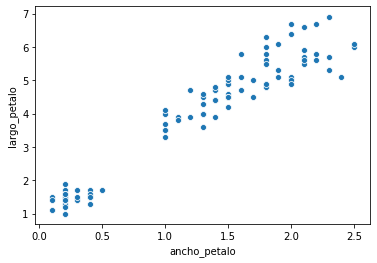

In [0]:
x =iris['ancho_petalo']
y= iris['largo_petalo']
sns.scatterplot(x, y,data=iris)

La segunda gráfica que realizaremos hoy en clase será la **gráfica de distribución** que requiere declarar antes **solo una variable**

Para ello escoge una columna del dataset iris para graficar

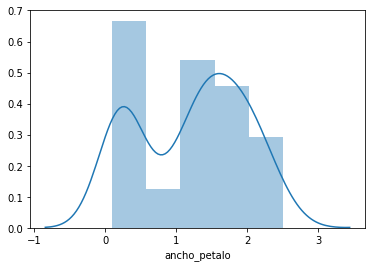

In [0]:
#El parámetro bins te permite variar el número de intervalos en la gráfica
sns.distplot(iris["ancho_petalo"],bins=5)

La tercera gráfica que realizaremos hoy en clase será **pairplot** qu no requiere **declarar ninguna variable**.
Además puedes dibujar todas las relaciones entre todas las variables

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


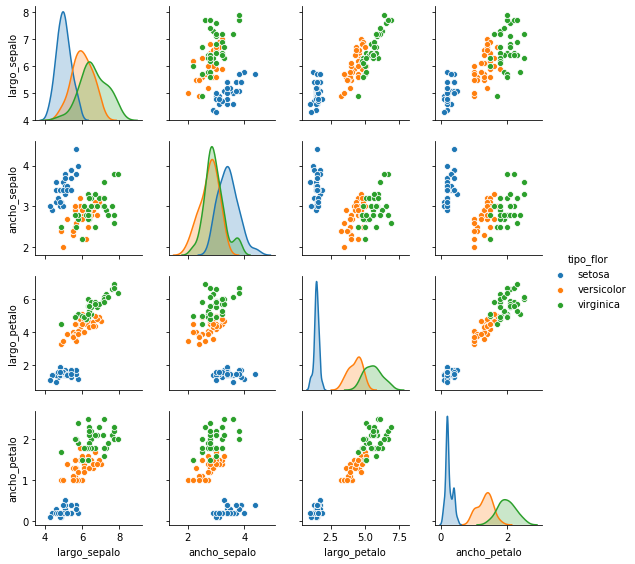

In [0]:
#El parámetro hue le da nombre a la leyenda del gráfico y el size permite limitar el tamaño del gráfico (mientras más pequeño es más facil ver)
sns.pairplot(iris, hue='tipo_flor', size=2.0)

# Tratamiento de la Data

Identificamos como **variable objetivo** (target) como 'species'. Las demás variables serán las **predictoras** (features) para el modelo. También podemos obtener estadísticos básicos de estas variables.

In [0]:
#Creamos una variable y_iris para guardar la columna species del dataset iris
y_iris = iris['tipo_flor']

In [0]:
#Creamos una variable X_iris para guardar el resultado de eliminar la columna species del dataset iris
X_iris = iris.drop('tipo_flor', axis=1) 
#axis = 1 es para las columnas, axis = 0 es para las filas.

In [0]:
#Para visualizar el tamaño del dataset utilizamos el método shape, como resultado obtenemos el números de filas y columnas (en este orden)
X_iris.shape

(100, 4)

Estos descriptivos verifican que las cuatro variables almacenan **150 observaciones**, todas ellas con datos numéricos. Para este ejemplo no contamos con datos *categóricos* (no numéricos) y tampoco aparecen vacíos o errores. Sobre el tratamiento de este tipo de datos profundizaremos en las siguientes sesiones de clase

## Haremos PCA para poder ver que una clusterización te agrupa de manera intuitiva los targets.


Para aplicar el modelo de *clustering* vamos a realizar una **reducción de dimensionalidad** donde las variables predictoras se reducen a solo dos (2) PCA -que son las iniciales de *Principal Component Analysis*- de esta manera vamos a visualizar el dataset iris en función de solo dos *nuevas variables predictoras* denominadas PCA1 y PCA2

In [0]:
#Importamos la librería PCA
from sklearn.decomposition import PCA

#Creamos  una variable feature_pca para asignar PCA, definimos el valor de n_components para limitar a dos las variables finales
features_pca = PCA(n_components=2)

In [0]:
#Adaptamos la variable creada feature_pca con la data guardada en X_iris
features_pca.fit(X_iris)

#Creamos una variable X_2D para guardar este último cambio
X_2D = features_pca.transform(X_iris)

In [0]:
print(X_2D)

[[-2.79388723  0.31773453]
 [-2.82498165 -0.16977798]
 [-3.00183191 -0.14737925]
 [-2.85862741 -0.32040471]
 [-2.8394125   0.32023224]
 [-2.39061534  0.72672501]
 [-2.9354961  -0.10383377]
 [-2.73648245  0.16211238]
 [-3.00121703 -0.57943909]
 [-2.78237359 -0.10491582]
 [-2.6143375   0.64462947]
 [-2.72460294  0.00898794]
 [-2.89656827 -0.22573135]
 [-3.33876799 -0.51282425]
 [-2.74959173  1.17935649]
 [-2.49416027  1.31690471]
 [-2.73381426  0.79633825]
 [-2.75926072  0.30582733]
 [-2.30579637  0.87185563]
 [-2.69915647  0.49949885]
 [-2.41704256  0.39874802]
 [-2.6559648   0.41723338]
 [-3.33045184  0.11840322]
 [-2.4154782   0.08908645]
 [-2.46720375 -0.04322199]
 [-2.61642209 -0.13672404]
 [-2.58142971  0.12089467]
 [-2.6711274   0.36819179]
 [-2.74836197  0.31523682]
 [-2.74443273 -0.19958918]
 [-2.69890746 -0.20208689]
 [-2.519389    0.40974024]
 [ 1.18095943  0.67881484]
 [ 0.82222584  0.29455087]
 [ 1.35879045  0.49388218]
 [ 0.06841964 -0.83858777]
 [ 0.97924631  0.06357502]
 

Añadimos al dataset iris las dos dimensiones ya obtenidas: PCA 1 y PCA 2

In [0]:
#Añadimmos una columna denominada PCA1 al dataset iris usando la columna 0 de la variable X_2D, es decir la primera columna contando de izquierda a derecha
iris['PCA1'] = X_2D[:, 0]

#Añadimmos una columna denominada PCA2 al dataset iris usando la columna 1 de la variable X_2D, es decir la segunda columna contando de izquierda a derecha
iris['PCA2'] = X_2D[:, 1]

# Selección y preparación del modelo

Ahora vamos a seleccionar un **modelo de clustering o agrupamiento** denominado *Kmeans*. Este modelo lo vamos a adaptar con las nuevas dos dimensiones que obtuvimos a partir de X_iris (PCA1, PCA2). Ambas variables están guardadas en X_2D

In [0]:
#Importamos la librería KMeans
from sklearn.cluster import KMeans

#Creamos una variable kmeans para guardar el modelo Kmeans
#Definimos los parámetros n_clusters para limitar solo tres agrupamientos, también podemos definir el máximo de iteraciones con max_iter
kmeans = KMeans(n_clusters=3, max_iter=600)

In [0]:
#Perfilamos el modelo kmeans con los datos guardados en X_2D
kmeans = kmeans.fit(X_iris)

In [0]:
#Creamos una variable predicciones para obtener las predicciones usando el modelo kmeans a partir de los datos guardados en X_2D
predicciones = kmeans.predict(X_iris)

In [0]:
predicciones

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1], dtype=int32)

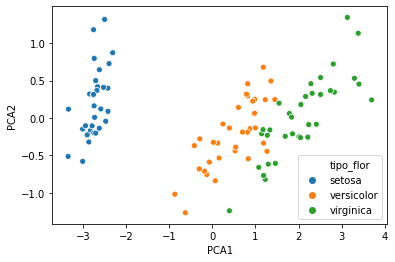

In [0]:
x =iris['PCA1']
y= iris['PCA2']
sns.scatterplot(x, y,hue='tipo_flor',data=iris)

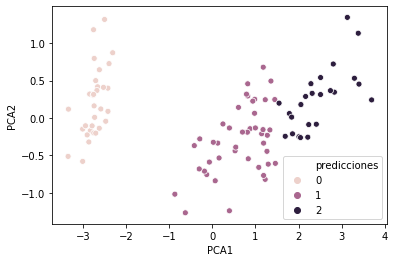

In [0]:
iris['predicciones'] = predicciones
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'predicciones',data = iris)

# KModes #
 Es usado para el clustering (agrupamiento) de variables categoricas ( tipo texto ). Define los clusters basados en el numero de categorias coincidentes con el centroide o centro de masa de los datos punteados asociado.

In [3]:
#Instalamos el modulo de kmodes
pip install kmodes 

In [0]:
#Importamos las librerias necesarias
#Numpy y panda para manipulacion de dataframes y uso de arrays
import numpy as np
import pandas as pd
#KModes para usar la implementacion del algoritmo en si
from kmodes.kmodes import KModes

In [0]:
#La instancia km de KModes la establecemos con los siguientes parametros:
#n_clusters : numero entero de clusters a determinar
#init       : tipo de metodo para inicializar : 'Huang' , 'Cao' , 'random' (aleatorio)
#n_init     : numero entero de veces que correra el algoritmo cambiando el centroide
#             de las cuales se desplegara la mejor salida en terminos de costo
km=KModes(n_clusters=3,init='Huang',n_init=5)

In [0]:
#Leeemos el archivo people.csv 
X_test=pd.read_csv('https://raw.githubusercontent.com/javalillo13689/hackspace/master/people.csv')

In [7]:
#Mostramos las primeras 3 filas de la data
X_test.head(3)

,SEXO,UNIVERSIDAD,PERFIL,CARRERA,POSICION,ESPECIALIZACION_DATA SCIENCE,DIA_PREFERIDO
0,F,ULIMA,JOVEN,ADMINISTRACION,ANALISTA,NO,SABADO
1,M,OTROS,ADULTO,ADMINISTRACION,NaN,NO,VIERNES
2,M,OTROS,ADULTO,ADMINISTRACION,OTROS,NO,VIERNES


In [0]:
#Dado que observamos en la fila 2 en la columna posicion un valor NaN procedemos a eliminarlo
#en este caso ya que son datos perdidos o vacios que nos llevarian al error

#Para elimianar las filas con valores nulos usamos el metodo dropna
#inplace=True nos dice que incluya los cambios en la tabla X_test , de otro modo solo lo muestra
#más no lo modifica
X_test.dropna(inplace=True)
#Debido a la eliminación de las filas con valores nulos el indice se encuentra desordenado
#Para reiniciar los indices y mantener el orden de estos
X_test.reset_index(drop=True,inplace=True)

In [0]:
#Renombramos la data como data_kmodes(No obligatorio, se puede seguir usando X_test)
data_kmodes=X_test
#Mediante el metodo fit_predict ingresamos el dataframe data_kmodes para obtener
#los valores del cluster al cual pertenece cada fila
clusters=km.fit_predict(data_kmodes)

In [0]:
#A nuestro dataframe le agregamos una columna mas llamada cluster a la cual le asignamos
#los valores obtenidos en la celda anterior
X_test['cluster']=clusters

In [20]:
#Visualizamos a la izquierda del dataframe que se ha añido la columna cluster con
#valores del 0 al 2 que seria el identificador para cada cluster
display(X_test)

,SEXO,UNIVERSIDAD,PERFIL,CARRERA,POSICION,ESPECIALIZACION_DATA SCIENCE,DIA_PREFERIDO,cluster
0,F,ULIMA,JOVEN,ADMINISTRACION,ANALISTA,NO,SABADO,1
1,M,OTROS,ADULTO,ADMINISTRACION,OTROS,NO,VIERNES,0
2,M,OTROS,ADULTO,ADMINISTRACION,OTROS,NO,VIERNES,0
3,F,SAN MARCOS,JOVEN,CIENCIAS PURAS,ESTUDIANTE,NO,SABADO,1
4,M,SAN MARCOS,JOVEN,CIENCIAS PURAS,OTROS,NO,SABADO,1
...,...,...,...,...,...,...,...,...
110,M,OTROS,ADULTO,OTRA INGENIERIA,LIDER,NO,SABADO,0
111,F,PUCP,JOVEN,OTRA INGENIERIA,OTROS,NO,VIERNES,0
112,M,UNI,JOVEN,OTRA INGENIERIA,LIDER,NO,VIERNES,0
113,M,OTROS,JOVEN,OTRA INGENIERIA,ESTUDIANTE,NO,VIERNES,0
